<center><font size="5"><p style="text-align: center;"><b> Ising Model - Numerical Solutions </p></font></center>

## Task a)
First, we consider the Ising model in the "mean-field" approximation. To compute the magnetization m as a function of the magnetic field b, we have to solve non linear equations. Therefore we use the nsolve package from sympy.

In [248]:
import numpy as np
from numpy.random import rand
import sympy as sy
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [147]:
j = 0.0
b_mf = np.arange(-1,1,10**-2)
m_mf = np.zeros((b_mf.size))

In [148]:
'''
for i in range(b_mf.size):
   m = sy.S('m')
   m_mf[i] = sy.nsolve(m-sy.tanh(b_mf[i]+4*j*m), (m), (-1.1,-0.1))
'''

"\nfor i in range(b_mf.size):\n   m = sy.S('m')\n   m_mf[i] = sy.nsolve(m-sy.tanh(b_mf[i]+4*j*m), (m), (-1.1,-0.1))\n"

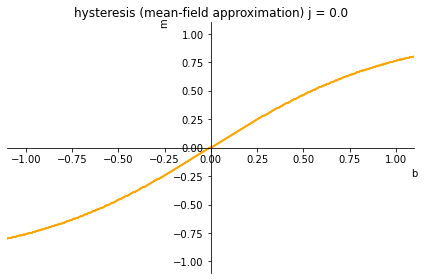

In [219]:
sy.var('x y')
sy.plot_implicit(y - sy.tanh(x + 4*j*y), (x,-1.1,1.1), (y,-1.1,1.1), xlabel='b', ylabel='m', adaptive=False, line_color="orange", title="hysteresis (mean-field approximation) j = 0.0")

## Task b)
Now we turn to the numerical solution using the Metropolis algorithm.

In [220]:
def initialstate(N):   
    # Generates a random spin configuration for initial condition
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

In [221]:
def mcmove(config, b, j):
    # Monte Carlo move using Metropolis algorithm 
    for i in range(N):
        for l in range(N):
            # Choose a random atom
            #x = np.random.randint(0, N)
            #y = np.random.randint(0, N)
            x = i % N
            y = l % N
            # Get the spin of the atom at position (x,y)
            spin = config[x, y]
            # Choose randomly a new spin for the atom
            spin_new = 2*np.random.randint(2)-1
            # Compute the energy difference  
            energy_difference = -(spin_new-spin)*(b + j*(config[(x+1)%N,y] + config[x,(y+1)%N] + config[(x-1)%N,y] + config[x,(y-1)%N]))
            # Is Delta_E < 0, the new configuration is accepted
            if energy_difference < 0:
                spin = spin_new
            # Is Delta_E > 0, the new configuration will only be accepted with a certain probability
            elif rand() < np.exp(-energy_difference):
                spin = spin_new
            config[x, y] = spin
    return config

In [222]:
def calcEnergy(config, b, j):
    # Energy of a given configuration
    energy = 0
    for i in range(len(config)):
        for l in range(len(config)):
            spin = config[i,l]
            nb = config[(i+1)%N, l] + config[i,(l+1)%N] + config[(i-1)%N, l] + config[i,(l-1)%N]
            energy += -spin*(b + j*nb)
    return energy

In [223]:
def calcMag(config):
    # Magnetization of a given configuration
    mag = np.sum(config)
    return mag

Now we compute the mean energy〈e〉and magnetisation〈m〉per atom as a function of the magnetic field. Therefore we use a grid length of about 30, i.e. 900 atoms. 

In [270]:
N_b     = 100     #  number of magnetic field points
N       = 30      #  size of the lattice, N x N
eqSteps = 100     #  number of MC sweeps for equilibration

b = np.linspace(-1,1,N_b)                              # array for the external magnetic field
j_param = np.array([0.0, 0.3, 0.6])                    # array for different numerical parameters j
E,M = np.zeros((j_param.size, N_b)), np.zeros((j_param.size, N_b))  # array for the mean energy and magnetization

In [271]:
for j in range(j_param.size):
    for i in range(b.size):
        E1 = M1 = 0
        config = initialstate(N)
        
        for k in range(eqSteps):                       # equilibrate
            config = mcmove(config, b[i], j_param[j])  # Monte Carlo moves
        
        config = mcmove(config, b[i], j_param[j])           
        Ene = calcEnergy(config, b[i], j_param[j])     # calculate the energy
        Mag = calcMag(config)                          # calculate the magnetisation

        E1 = E1 + Ene                          
        M1 = M1 + Mag

        E[j,i] = E1 / (N*N*mcSteps)
        M[j,i] = M1 / (N*N*mcSteps)

(-1.1, 1.1, -0.8643333333333333, 0.8443333333333334)

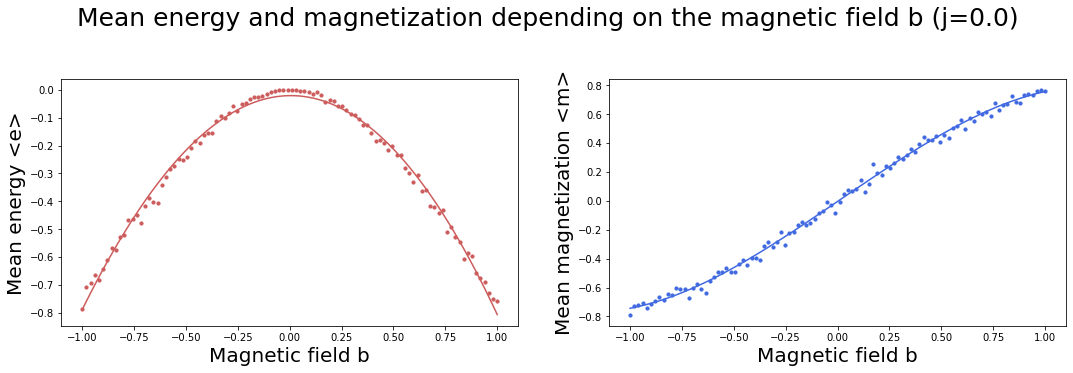

In [272]:
f = plt.figure(figsize=(18, 10)) # plot the calculated values for j = 0.0   
f.suptitle('Mean energy and magnetization depending on the magnetic field b (j=0.0)', fontsize=25)

# We use splines to smooth our values without a guess of a generating function
sE = UnivariateSpline(b, E[0,:], s=2)
sM = UnivariateSpline(b, M[0,:], s=2)

sp = f.add_subplot(2, 2, 1)
plt.scatter(b, E[0,:], s=10, marker='o', color='IndianRed')
plt.plot(b, sE(b), color='IndianRed')
plt.xlabel("Magnetic field b", fontsize=20)
plt.ylabel("Mean energy <e>", fontsize=20)        
plt.axis('tight')

sp = f.add_subplot(2, 2, 2)
plt.scatter(b, M[0,:], s=10, marker='o', color='RoyalBlue')
plt.plot(b, sM(b), color='RoyalBlue')
plt.xlabel("Magnetic field b", fontsize=20)
plt.ylabel("Mean magnetization <m>", fontsize=20)
plt.axis('tight')

Text(0, 0.5, 'Mean energy <e>')

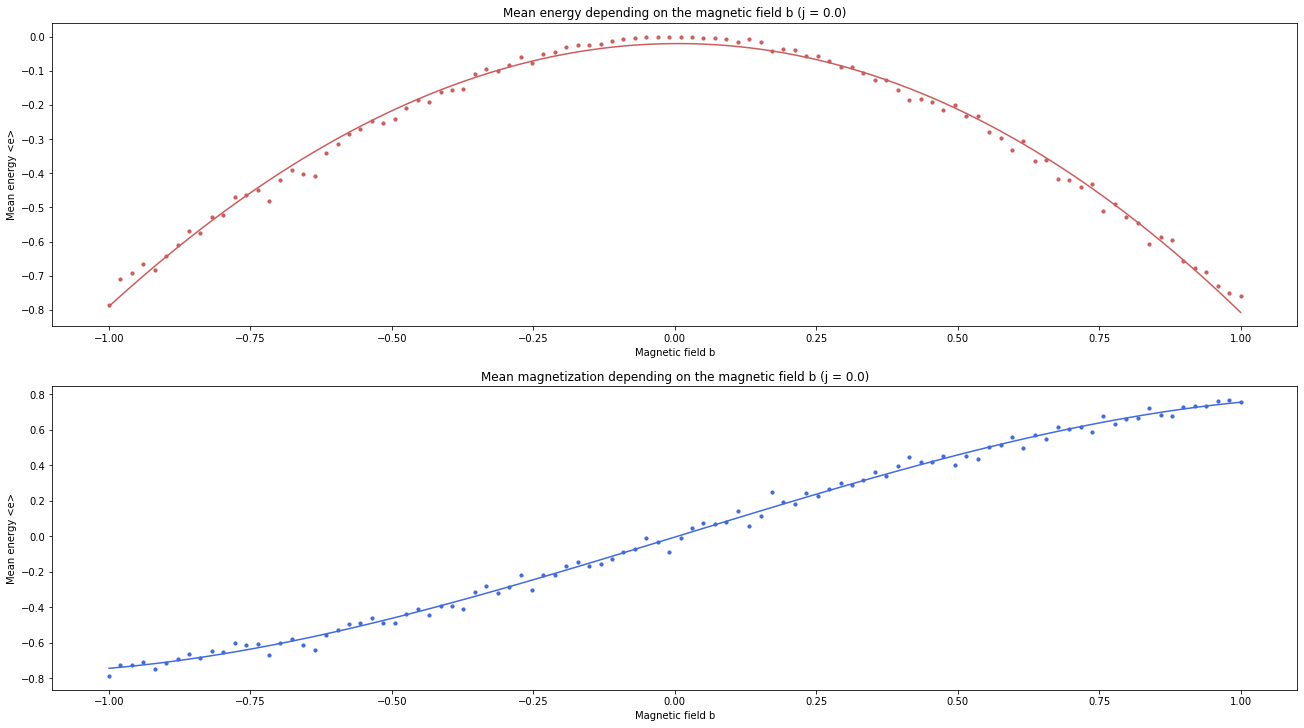

In [273]:
# Use another layout for the plots
fig, axs = plt.subplots(2, 1, figsize=(18, 10), constrained_layout=True)

axs[0].scatter(b, E[0,:], s=10, marker='o', color='IndianRed')
axs[0].plot(b, sE(b), color='IndianRed')
axs[0].set_title('Mean energy depending on the magnetic field b (j = 0.0)')
axs[0].set_xlabel("Magnetic field b")
axs[0].set_ylabel("Mean energy <e>")

axs[1].scatter(b, M[0,:], s=10, marker='o', color='RoyalBlue')
axs[1].plot(b, sM(b), color='RoyalBlue')
axs[1].set_title('Mean magnetization depending on the magnetic field b (j = 0.0)')
axs[1].set_xlabel("Magnetic field b")
axs[1].set_ylabel("Mean energy <e>")

We are now going to solve the Ising model for two other values of j (j = 0.3 and j = 0.6)

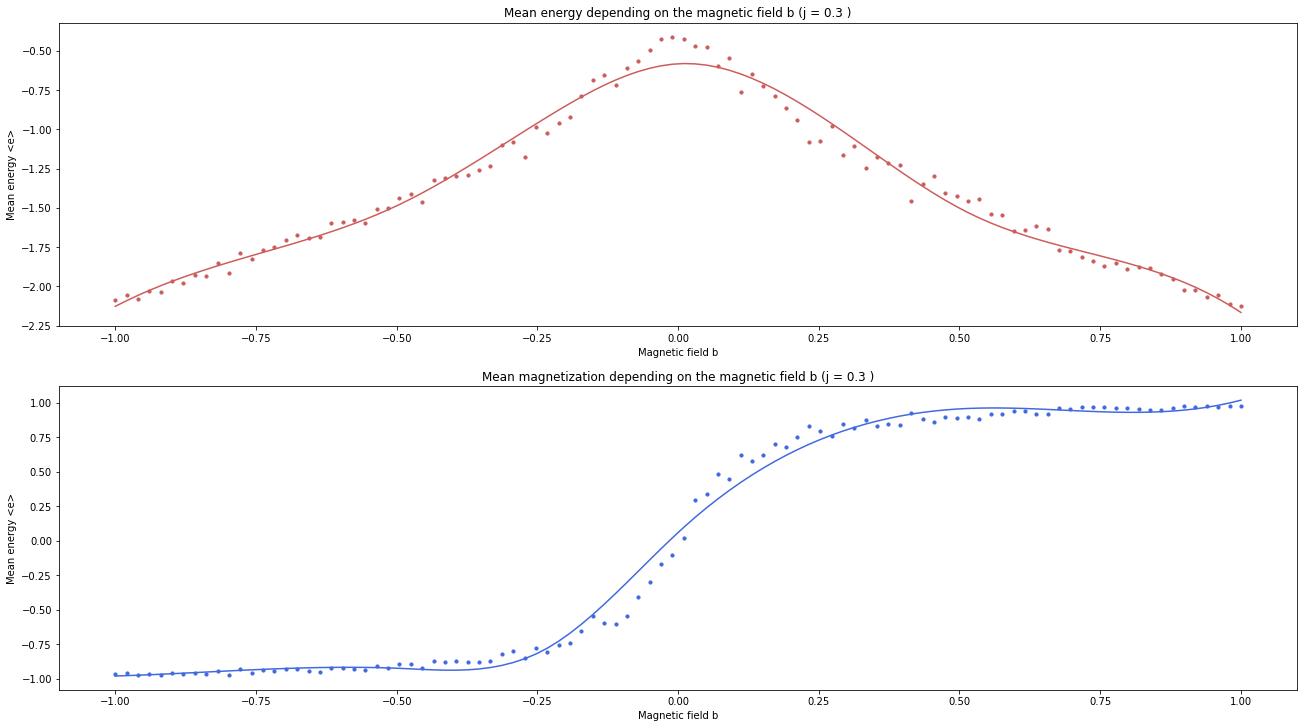

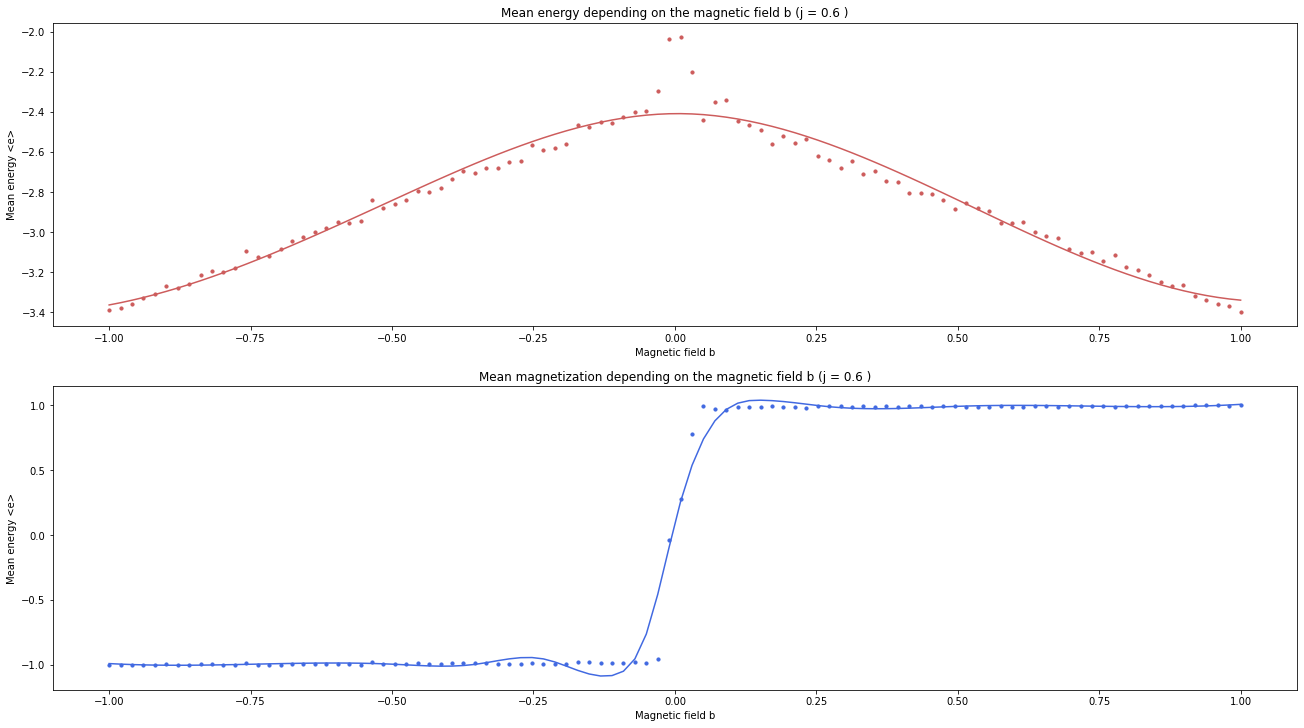

In [282]:
for j in range(1, j_param.size):
    fig, axs = plt.subplots(2, 1, figsize=(18, 10), constrained_layout=True)

    sE = UnivariateSpline(b, E[j,:], s=0.5)
    sM = UnivariateSpline(b, M[j,:], s=0.5)

    axs[0].scatter(b, E[j,:], s=10, marker='o', color='IndianRed')
    axs[0].plot(b, sE(b), color='IndianRed')
    axs[0].set_title('Mean energy depending on the magnetic field b (j = ' + str(j_param[j]) + ' )')
    axs[0].set_xlabel("Magnetic field b")
    axs[0].set_ylabel("Mean energy <e>")

    axs[1].scatter(b, M[j,:], s=10, marker='o', color='RoyalBlue')
    axs[1].plot(b, sM(b), color='RoyalBlue')
    axs[1].set_title('Mean magnetization depending on the magnetic field b (j = ' + str(j_param[j]) + ' )')
    axs[1].set_xlabel("Magnetic field b")
    axs[1].set_ylabel("Mean energy <e>")

If j decreases the energy also decreases. On the other hand we get a sharp bend at b = 0 (no external magnetic field), where the magnetization changes its sign. This corresponds to a small temperature, we will get ordered (ferromagnetic) states, for the low j value (high temperature) we expect less order. In fact there is a criticalvalue for j, at which the transition between ferromagnetic and non-ferromagneticstate occurs. We estimate this value to be about j = 0.4 - 0.5.